<a href="https://colab.research.google.com/github/Culpeo/4bit-Alpaca-Kobold-Colab/blob/main/4bit_Alpaca_Kobold_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Execute this cell and wait until the code is completed (this takes about 9 minutes).

In [ ]:
# Get everything up and running with this script. This code should only run once.
import os.path

if not os.path.exists("/content/KoboldAI"):

  # 1. Install and set up ngrok. This will allow us to access Kobold easily via link.
  !pip install pyngrok --quiet
  from pyngrok import ngrok

  # 2. Download 0cc4m's 4bit KoboldAI-branch
  !git clone --branch 4bit https://github.com/0cc4m/KoboldAI
  %cd /content/KoboldAI

  # 3. Initiate KoboldAI environment
  !./install_requirements.sh cuda

  # 4. Set up Cuda in KoboldAI environment
  !echo -en 'cd /content/KoboldAI/repos/gptq\npip install git+http://github.com/huggingface/transformers\npip install datasets\npip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118\r\npython setup_cuda.py install' > run.sh
  !bin/micromamba run -r runtime -n koboldai sh run.sh

In [ ]:
#@markdown Select connect_to_google_drive if you want to load or save models in your Google Drive account. The parameter gdrive_model_folder is the folder name of your models within "My Drive". <b>This will allow people that you shared your link with to upload and downloads models to your Google Drive. Use this with caution!</b>
connect_to_google_drive = False #@param {type:"boolean"}
gdrive_model_folder = "Models" #@param {type:"string"}
gdrive_path_to_models = "/content/gdrive/My Drive/" + gdrive_model_folder
#@markdown Select the option "download_alpaca_13b" to download the Alpaca model from https://huggingface.co/elinas/alpaca-13b-lora-int4. If you connected to your Google Drive, this will save the model in Google Drive. Otherwise, it will save the file locally in the runtime.
download_alpaca_13b = True #@param {type:"boolean"}
#@markdown Alternatively, choose this 30b model: https://huggingface.co/elinas/alpaca-30b-lora-int4. This will _only_ work with a Premium GPU, so you will need Colab compute units for this.
download_alpaca_30b = False #@param {type:"boolean"}
#@markdown You probably want to select at least one of these options. Alternatively, you can download a model via the Kobold user interface. Please note that this model will be saved into Google Drive if you previously chose "connect_to_google_drive".

# 5. Get model(s)
# If you connect Google Drive, it will remove the models folder and create a link to gdrive_model_folder in your Google Drive
if connect_to_google_drive == True:
  from google.colab import drive
  drive.mount('/content/gdrive')

  if not os.path.isdir(gdrive_path_to_models):
    raise Exception("Folder with the name " + gdrive_path_to_models + " not found. Please enter a valid folder name.")

  %cd /content/KoboldAI
  !rm models/"models go here.txt"
  !rm -d models
  !rm models
  !ln -s "{gdrive_path_to_models}" models

if download_alpaca_13b == True:
  %cd /content/KoboldAI/models
  !git clone https://huggingface.co/elinas/alpaca-13b-lora-int4
  %cd /content/KoboldAI/models/alpaca-13b-lora-int4
  !mv alpaca-13b-4bit.pt 4bit.pt
  %cd /content/KoboldAI

if download_alpaca_30b == True:
  %cd /content/KoboldAI/models
  !git clone https://huggingface.co/elinas/alpaca-30b-lora-int4
  %cd /content/KoboldAI/models/alpaca-30b-lora-int4
  !mv alpaca-30b-4bit.pt 4bit.pt
  %cd /content/KoboldAI

  

In [ ]:
# Execute this to start the server.
!sh play.sh --remote --override_rename --override_delete --nobreakmodel --quiet --lowmem

After executing the last cell, you will see a few links in the output. Open the UI2 link that looks like this: 
http://#####.trycloudflare.com/new_ui

Go to the interface menu and set "Experimental UI" to On.

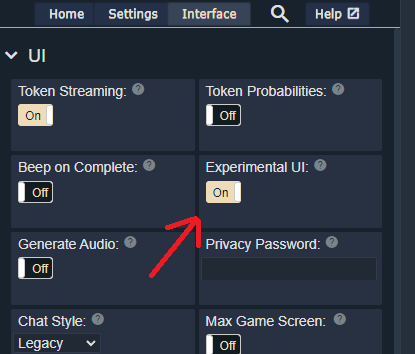

Then go back to the Home tab and load your model. Make sure to set the switch to 4 bit mode.

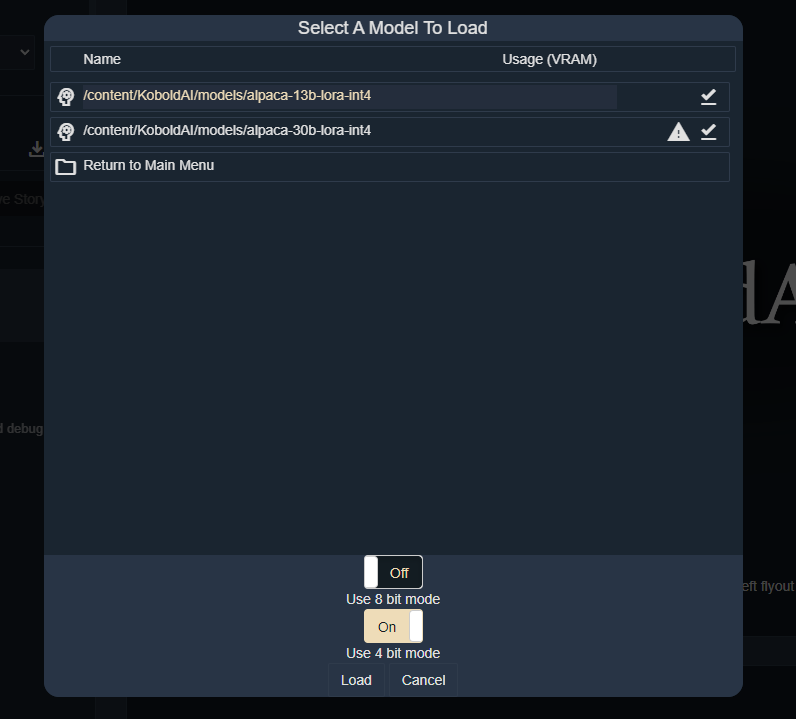

Kobold will now load the model tensors. Once the progress reached 100%, you are good to go!